# Import libraries

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

# Importing Datasets

In [5]:
path =  r'/Users/isomwinton/Desktop/Desktop - Isom’s MacBook Pro/Career Foundry/Data Immersion/Achievement 6/USA Real Estate Analysis 03-2024'

In [6]:
#import pickle file
usa = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'real_estate_cleaned_3-10-2024_revised2.pkl'))


In [7]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946899 entries, 0 to 2001665
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   status          946899 non-null  category      
 1   bed             946899 non-null  float64       
 2   bath            946899 non-null  float64       
 3   acre_lot        946899 non-null  float64       
 4   city            946835 non-null  object        
 5   state           946899 non-null  object        
 6   zip_code        946899 non-null  object        
 7   house_size      946899 non-null  float64       
 8   prev_sold_date  576677 non-null  datetime64[ns]
 9   price           946899 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(5), object(3)
memory usage: 73.1+ MB


In [8]:
# Check for duplicates

usa_dups = usa[usa.duplicated()]

In [9]:
usa_dups.shape

(853852, 10)

In [10]:
usa = usa.drop_duplicates()


In [11]:
# Checking for mix data types

for col in usa.columns.tolist():
      weird = (usa[[col]].applymap(type) != usa[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (usa[weird]) > 0:
        print (col)

city
prev_sold_date


/var/folders/r1/45vn24q975v7qtz_2kj_sm740000gn/T/ipykernel_12312/1864037875.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (usa[[col]].applymap(type) != usa[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/r1/45vn24q975v7qtz_2kj_sm740000gn/T/ipykernel_12312/1864037875.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (usa[[col]].applymap(type) != usa[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/r1/45vn24q975v7qtz_2kj_sm740000gn/T/ipykernel_12312/1864037875.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (usa[[col]].applymap(type) != usa[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/r1/45vn24q975v7qtz_2kj_sm740000gn/T/ipykernel_12312/1864037875.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (usa[[col]].applymap(type) != usa[[col]].iloc[0].apply(type)).any(axis = 1)


### Creating a correlation matrix

In [12]:
# In order to complete the correlation analysis, I need to create a separate dataframe that only includes the variables I want to analyze: 'bed', 'bath', 'acre_lot', 'house_size', and 'price'. 
corr_variables = ['bed', 'bath', 'acre_lot', 'house_size','price'] 
matrix_variables_df = usa[corr_variables]
matrix_variables_df.corr()



bed      bath  acre_lot  house_size     price
bed         1.000000  0.502740 -0.006197    0.584715  0.264268
bath        0.502740  1.000000  0.102340    0.701181  0.527212
acre_lot   -0.006197  0.102340  1.000000    0.164022  0.093342
house_size  0.584715  0.701181  0.164022    1.000000  0.484799
price       0.264268  0.527212  0.093342    0.484799  1.000000

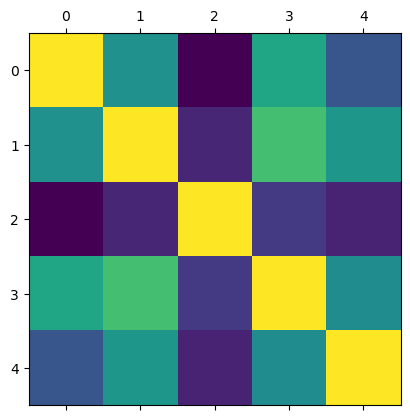

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(matrix_variables_df.corr())
plt.show()

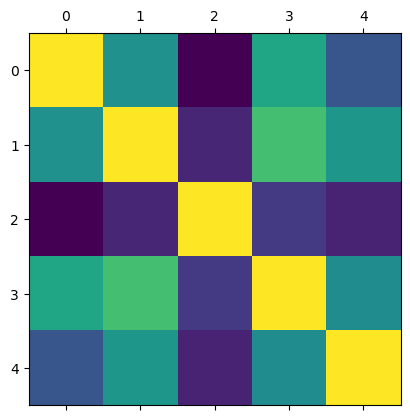

In [14]:
# Save figure
plt.matshow(matrix_variables_df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 

In [10]:
# let's us know where the current directory is and where the image was saved
cwd = os.getcwd()
cwd

'/Users/isomwinton/Desktop/Desktop - Isom’s MacBook Pro/Career Foundry/Data Immersion/Achievement 6/USA Real Estate Analysis 03-2024/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix of USA Real Estate')

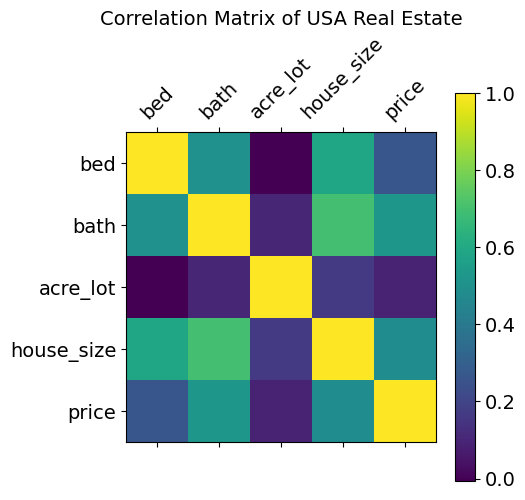

In [15]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(5, 5)) # figure size 
plt.matshow(matrix_variables_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(matrix_variables_df.shape[1]),matrix_variables_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(matrix_variables_df.shape[1]), matrix_variables_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix of USA Real Estate', fontsize=14) # add title

### 3. Create a correlation map using seaborn


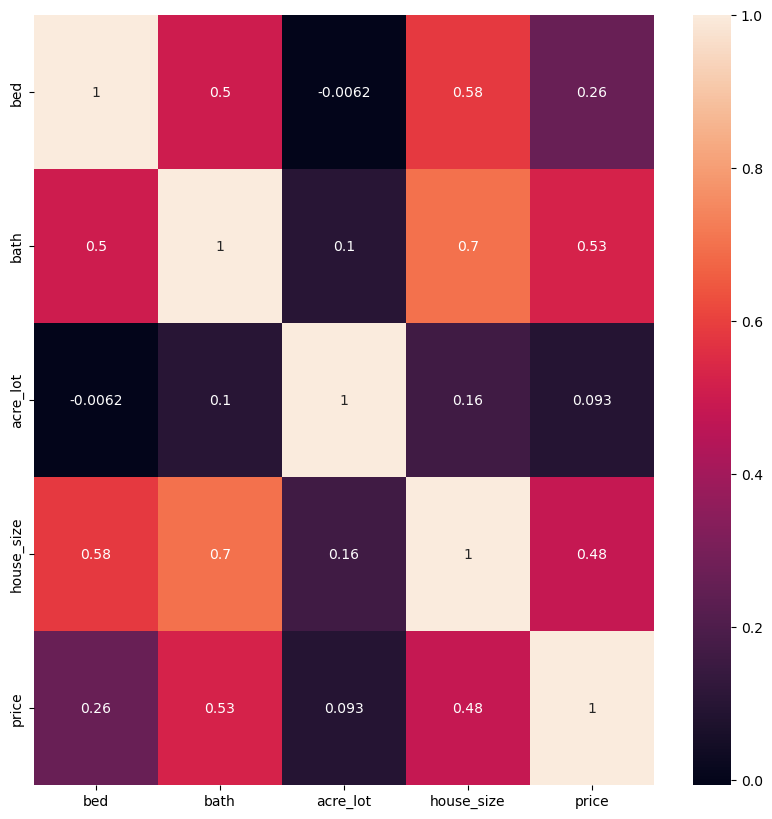

In [16]:
# I've already created a sub dataframe above using just the applicable variables. 
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(matrix_variables_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### If we are looking at what factors most impact the price of real estate in the US, we can conclude the number of bathrooms and the house size could play moderate role. 

## 4. Scatterplots for Exploring Relationships

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


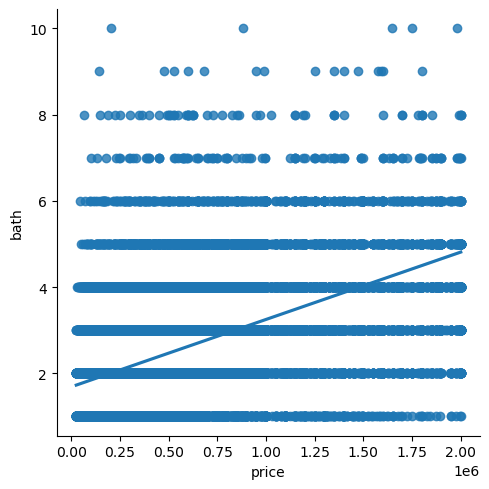

In [17]:
# Create a scatterplot for the "price" and "bath" columns in seaborn

sns.lmplot(x = 'price', y = 'bath', data = matrix_variables_df)

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


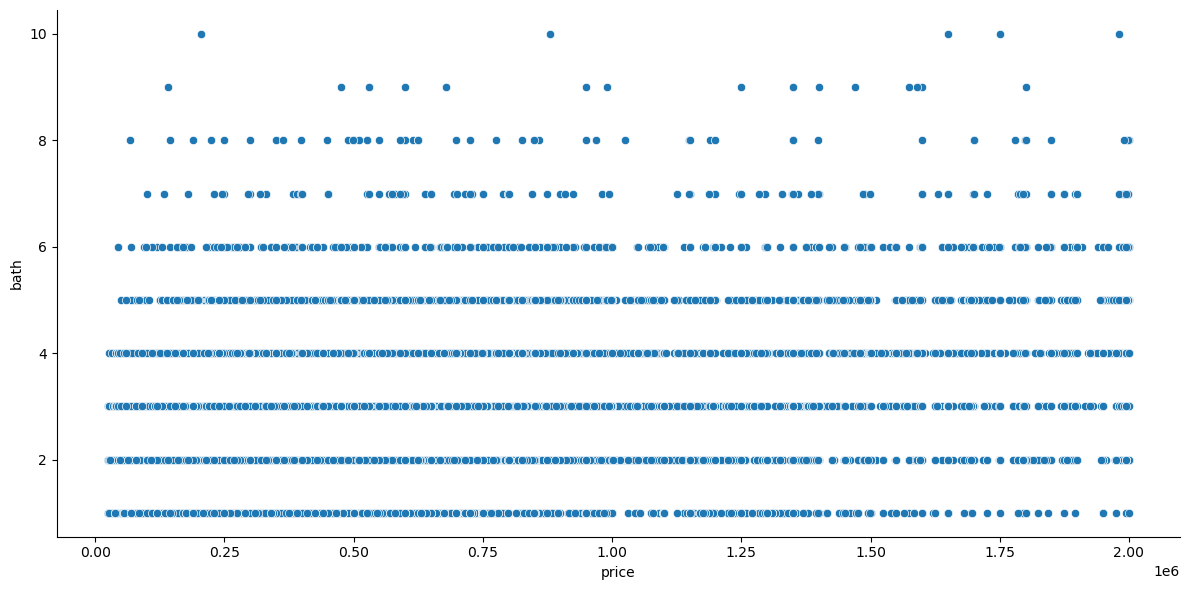

In [18]:
# Create a scatterplot and adjusting the size
scatter = sns.relplot(x= 'price', y='bath', data = matrix_variables_df, height=6, aspect=2)  # 'height' controls the height of each facet, 'aspect' controls width

plt.show(scatter)

### I had to research different ways to plot the scatterplots due to the nature of the data; price needed to be logarithmically transformed because the values were much higher than both 'bath' and 'house_size' variables. 

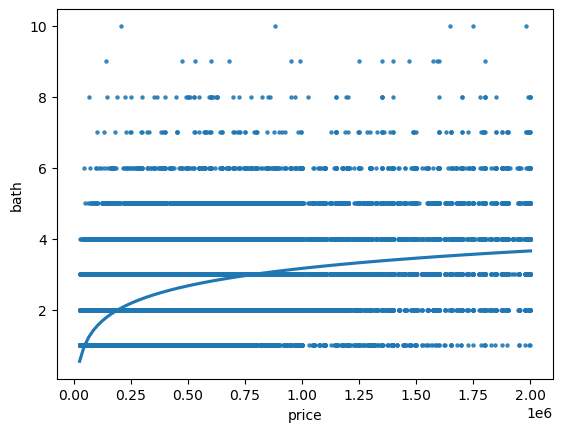

In [19]:
#trying different ways to view the data as there are several data points. 
sns.regplot(x='price', y='bath', data=matrix_variables_df, logx=True, scatter_kws={"s": 5})

#logx=True applies a logarithmic transformation to the x-variable, helping with large value ranges. 
#scatter_kws={"s": 5} is optional and makes the individual scatter points smaller, which can help in viewing trends in dense plots.

plt.show()

/var/folders/r1/45vn24q975v7qtz_2kj_sm740000gn/T/ipykernel_12312/540771254.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = matrix_variables_df.groupby(bins)['bath'].median()


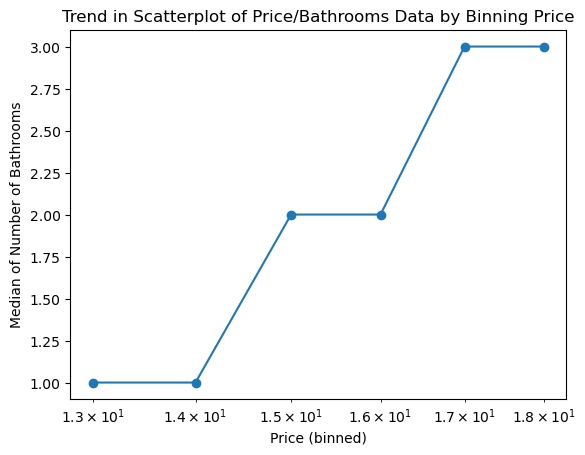

In [20]:
# For very large datasets or wide ranges, binning the data on the axis with a larger range 
#in this case, the x-axis) can help identify trends.

# Create bins for the x-variable
bins = pd.cut(matrix_variables_df['price'], bins=np.logspace(np.log10(1), np.log10(2000000), 20))
grouped = matrix_variables_df.groupby(bins)['bath'].median()  

# Categorize or bin the x-values and then plot the average, median, or range of y-values for each bin
# I used the median value as it's a more accurate way of representing the data with large data points

# Now plot
grouped.plot(kind='line', marker='o')
plt.xscale('log')  # Keep the x-axis on a log scale for clarity
plt.xlabel('Price (binned)')
plt.ylabel('Median of Number of Bathrooms')
plt.title('Trend in Scatterplot of Price/Bathrooms Data by Binning Price')
plt.show()

### By binning the 'Price' data logarithmically and plotting against 'bath' and  'house size' below, the charts provide a clearer view of how the median of each variable varies across different price ranges, especially when those ranges vary exponentially.

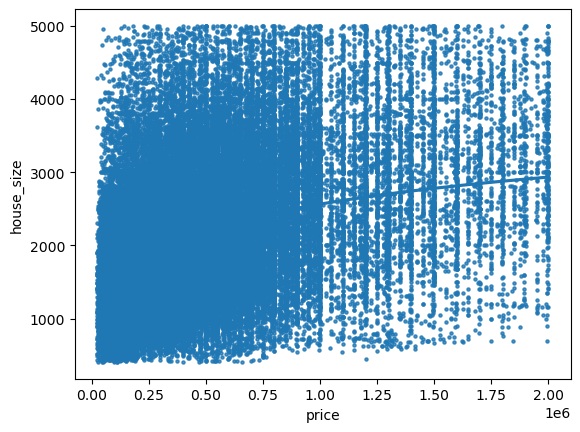

In [21]:
#trying different ways to view the data as there are several data points. 
sns.regplot(x='price', y='house_size', data=matrix_variables_df, logx=True, scatter_kws={"s": 5})

#logx=True applies a logarithmic transformation to the x-variable, helping with large value ranges. 
#scatter_kws={"s": 5} is optional and makes the individual scatter points smaller, which can help in viewing trends in dense plots.

plt.show()

/var/folders/r1/45vn24q975v7qtz_2kj_sm740000gn/T/ipykernel_12312/862520845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = matrix_variables_df.groupby(bins)['house_size'].median()


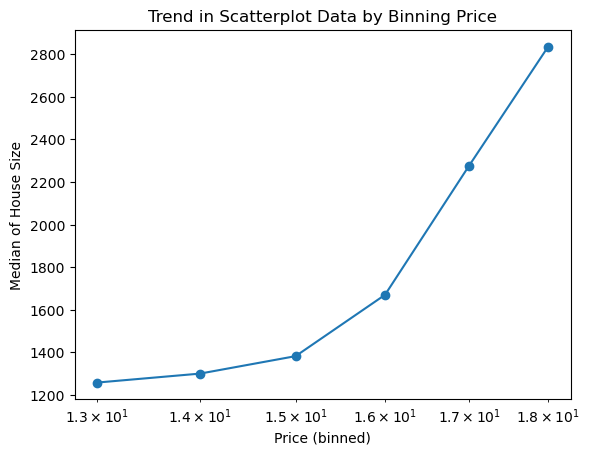

In [22]:
# Create bins for the 'price'variable
bins = pd.cut(matrix_variables_df['price'], bins=np.logspace(np.log10(1), np.log10(2000000), 20))
grouped = matrix_variables_df.groupby(bins)['house_size'].median()  

# Now plot
grouped.plot(kind='line', marker='o')
plt.xscale('log')  # Keep the x-axis on a log scale for clarity
plt.xlabel('Price (binned)')
plt.ylabel('Median of House Size')
plt.title('Trend in Scatterplot Data by Binning Price')
plt.show()


### This scatter plot of price and house size gives us a better indication of the relationship between 'price' and 'house_size'. We can see that after a certain price, the size of the house increases.  I dragged and dropped the graphs into my folder

## 5. Pair Plots


/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

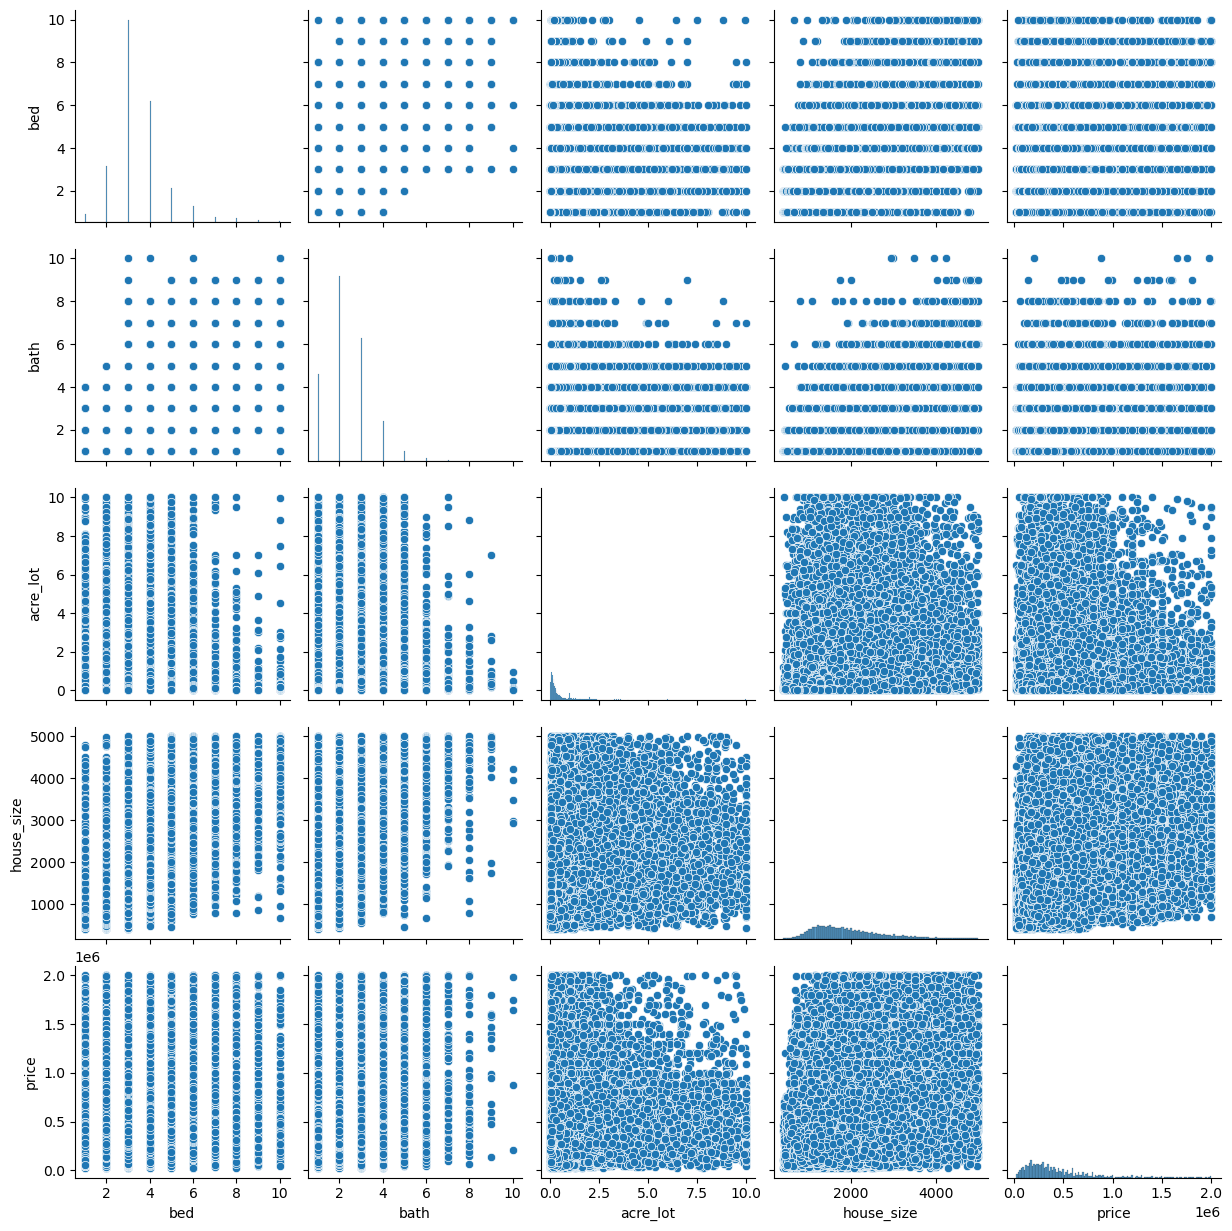

In [23]:
# Create a pair plot 

pair_plot = sns.pairplot(matrix_variables_df)

### Since there are too many data points, I  sampled a random percentage of the data to see if there is a clearer view below. 

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

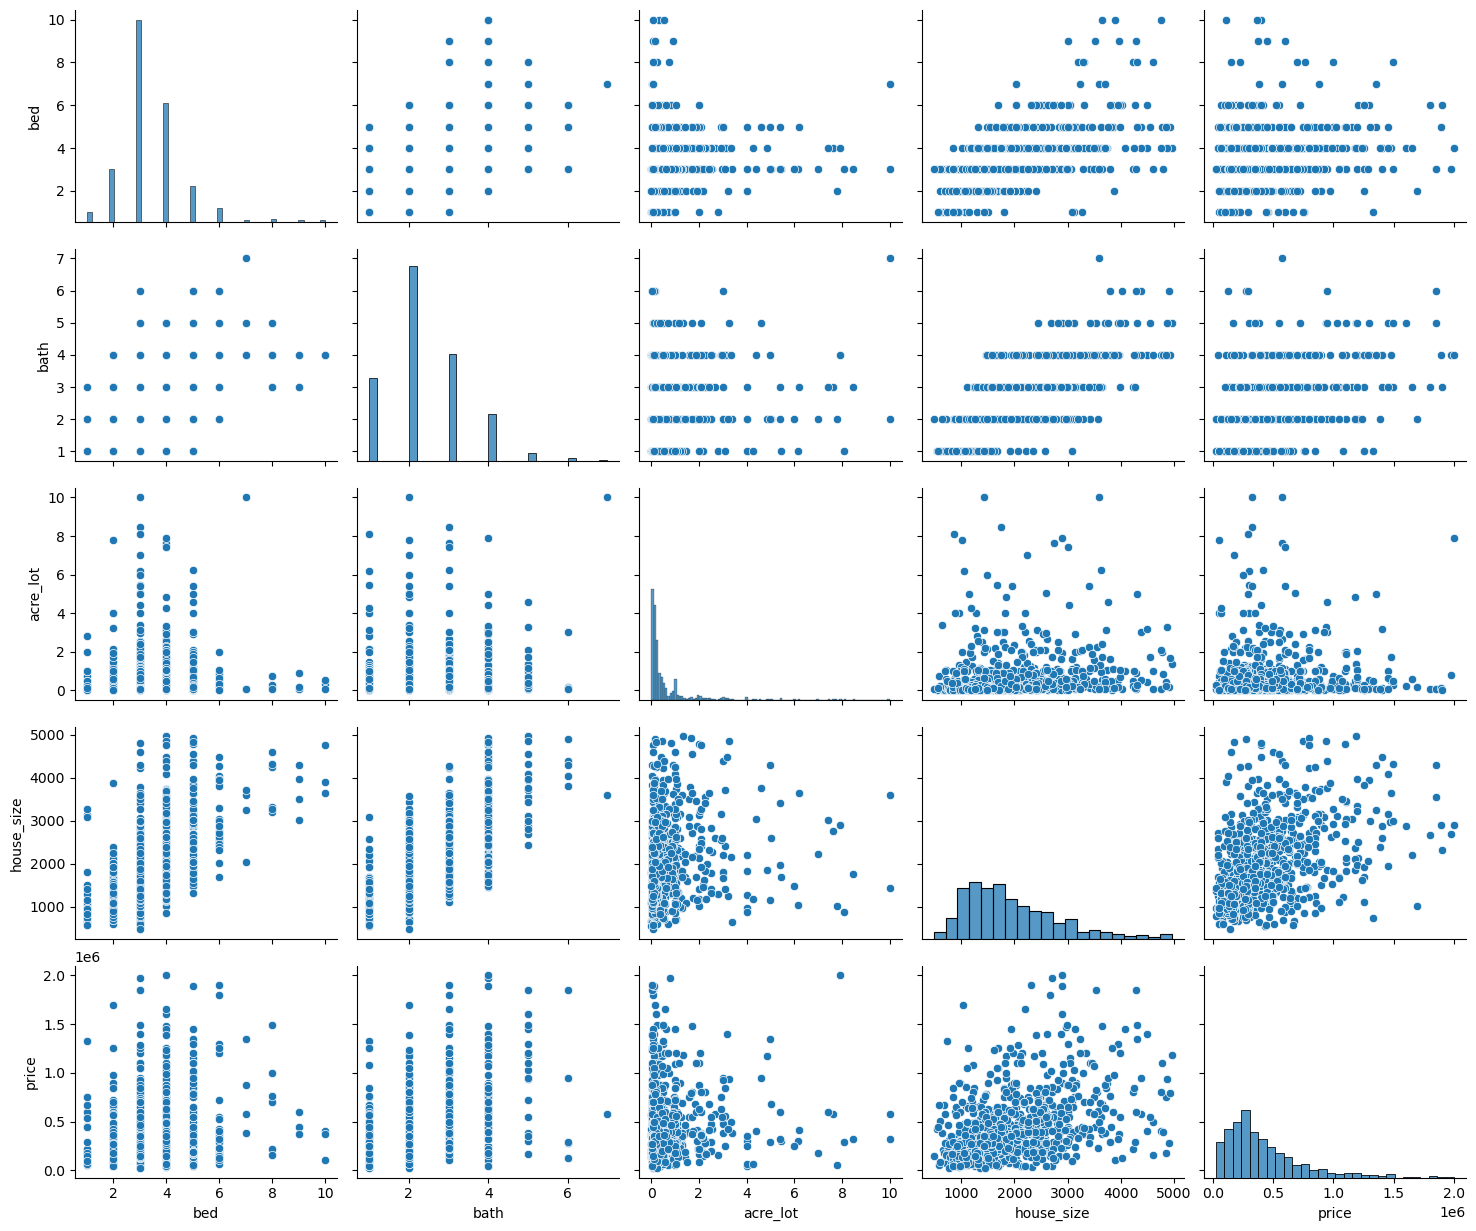

In [24]:
# Sampling 1% of the data
sampled_df = matrix_variables_df.sample(frac=0.01, random_state=42)  # frac used to describe the percent of data used from original 
#the random_state parameter ensures reproducibility every time the code is run. 
#Without setting random_state, we'd likely get a different random sample each time, making it hard to reproduce our results. 
#For example, selecting 1% of my dataset as a sample, setting random_state=42 means that every time I run the sampling code, I'll get the same set of randomly selected rows.
#After doing research, the number 42 is arbituary but those in the field is a reference to Douglas Adams' "The Hitchhiker's Guide to the Galaxy."

# Create a pairplot using the sampled data
sns.pairplot(sampled_df, height=2.5, aspect=1.2)  # Adjusting the height and width


### These pair plots are more readable. The data is still right skewed but the positive correlation bewteen 'price' & 'bath, 'price' & 'house_size' is more evident. 

## Categorical  Plots


/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

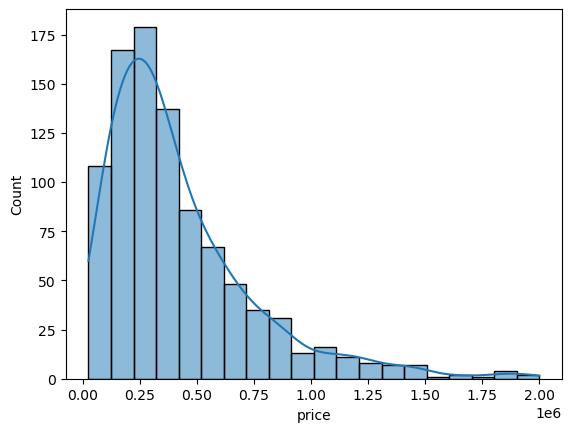

In [25]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sampled_df ['price'], bins = 20, kde = True)

### Creating price categories

In [26]:
# Apply the conditions to categorize prices
sampled_df.loc[(sampled_df['price'] >= 10000) & (sampled_df['price'] < 50000), 'price_category'] = 'Cheapest Housing'
sampled_df.loc[(sampled_df['price'] >= 50000) & (sampled_df['price'] < 100000), 'price_category'] = 'Low-end Affordable'
sampled_df.loc[(sampled_df['price'] >= 100000) & (sampled_df['price'] < 250000), 'price_category'] = 'Affordable'
sampled_df.loc[(sampled_df['price'] >= 250000) & (sampled_df['price'] < 400000), 'price_category'] = 'Middle Affordable'
sampled_df.loc[(sampled_df['price'] >= 400000) & (sampled_df['price'] < 650000), 'price_category'] = 'Upper Affordable'
sampled_df.loc[(sampled_df['price'] >= 650000) & (sampled_df['price'] < 800000), 'price_category'] = 'High-End'
sampled_df.loc[(sampled_df['price'] > 800000), 'price_category'] = 'Luxury'


In [27]:
sampled_df['price_category'].value_counts(dropna = False)

price_category
Middle Affordable     250
Affordable            242
Upper Affordable      190
Luxury                103
Low-end Affordable     65
High-End               61
Cheapest Housing       17
nan                     2
Name: count, dtype: int64

In [28]:
sampled_df.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'price', 'price_category'], dtype='object')

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


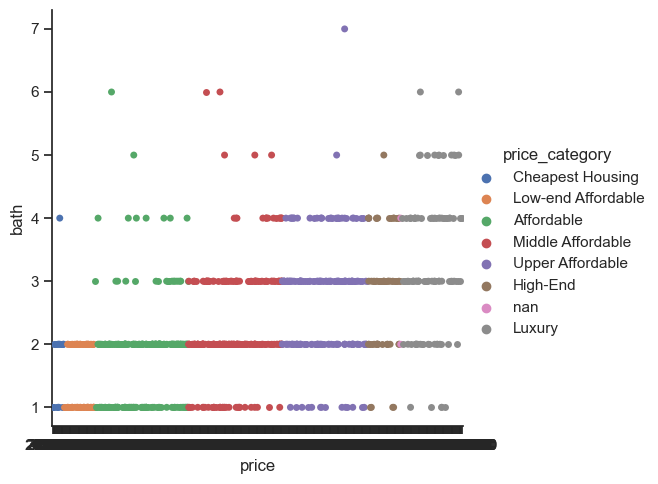

In [29]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="price", y="bath", hue="price_category", data=sampled_df)

### This categorical plot shows as the number of bathrooms increase so does the price of the home. However, the relationship is only moderately strong further evidenced by the fact there is a steady distribution of all categories of home price with varying number of bathrooms. This means a lot of our data may be concentrated in urban areas where space in limited. 

## 7. Revisit  6.1 relevant questions. 

What is the relationship between the number of bedrooms and bathrooms in a property and its market price across different states?
-->We can only see a moderately strong correlation between bedrooms and market price as explained above. 
After further analysis we will be able to dive into geographical pricing trends to identify areas with the highest valuation and examine how these prices align with property features/dimensions.

How do property size and land area relate to housing prices? 
-->We couldn't find significant relationships between these variables which suggests our property may be concentrated in urban areas with a full specturm of housing prices for all budgets. 


## 8. Define any hypotheses that you can at this point. 

Hypothesis: In the USA housing market, the number of bedrooms has a moderate impact on the market price of a property, while the number of bathrooms tends to have a more pronounced effect. However, this relationship may vary significantly across different geographical locations, particularly between urban and rural areas.

This hypothesis is grounded in the observations that:

-There is a moderately strong correlation between the number of bedrooms and market price.
-There is a relationship between the number of bathrooms and the price of the home, albeit moderately strong.
-There appears to be no significant relationship between property size/land area and housing prices, suggesting an urban concentration of properties.

In [30]:
# Export usa data to pkl
usa.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'real_estate_cleaned_no dups_3-12-2024.pkl'))